<a href="https://colab.research.google.com/github/punch-boxing/punch-ml/blob/main/punch_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.18.* tf-keras==2.18.* tensorflowjs && export TF_USE_LEGACY_KERAS=1

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import tf_keras as keras
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
import pandas as pd
import numpy as np

print(f"tensorflowjs version: {tfjs.__version__}")
print(f"tensorflow version: {tf.__version__}")

def is_using_legacy_keras():
    return "tf_keras" in tf.keras.__file__

print("Legacy Keras 2.x?" , is_using_legacy_keras())

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

tensorflowjs version: 4.22.0
tensorflow version: 2.18.0
Legacy Keras 2.x? True


In [ ]:
MODEL_INPUT_DIMENSION = 5
MODEL_GRU_UNITS = 1
WINDOW_SIZE = 20
PUNCH_TYPES = {
    "None": 0,
    "Straight": 1,
    "Hook": 2,
    "Body": 3,
    "Uppercut": 4,
}

In [ ]:
datas = []

for i in range(14):
  try:
    data = pd.read_csv(f"{i}.csv")
    data["punch"] = data["punch"].map(PUNCH_TYPES).fillna(0).astype(int)
    datas.append(data)
  except:
    pass

datas

[     index    time     acc x     acc y     acc z     ori x     ori z  punch
 0        0   0.000 -0.405289 -0.607330 -1.188766 -0.890514 -0.290511      0
 1        1   0.050 -0.153671 -0.573166 -0.833878 -0.824100  0.150148      0
 2        2   0.100 -0.219376 -0.618225 -0.683289 -0.741530  0.231601      0
 3        3   0.150 -0.100403 -0.621979 -0.410110 -0.550472  0.133559      0
 4        4   0.199  0.034866 -0.581284 -0.488037 -0.643006 -0.045889      0
 ..     ...     ...       ...       ...       ...       ...       ...    ...
 840    840  50.150 -0.057327 -0.530457 -0.895782 -0.860451  0.054983      0
 841    841  50.200 -0.053070 -0.511841 -0.812149 -0.846004  0.055198      0
 842    842  50.250 -0.188019 -0.595490 -0.798111 -0.801489  0.185536      0
 843    843  50.300 -0.181549 -0.613159 -0.767761 -0.781390  0.181696      0
 844    844  50.349 -0.132629 -0.665482 -0.563873 -0.646459  0.150327      0
 
 [845 rows x 8 columns],
      index    time     acc x     acc y     acc z

In [ ]:
X = []
y = []

for df in datas:
  acc_x = df['acc x'].values
  acc_y = df['acc y'].values
  acc_z = df['acc z'].values
  ori_x = df['ori x'].values
  ori_z = df['ori z'].values
  punch = df['punch'].values

  for i in range(len(df) - WINDOW_SIZE):
    X.append(np.array([
        acc_x[i:i+WINDOW_SIZE],
        acc_y[i:i+WINDOW_SIZE],
        acc_z[i:i+WINDOW_SIZE],
        ori_x[i:i+WINDOW_SIZE],
        ori_z[i:i+WINDOW_SIZE]
    ]).T) # Transpose to get shape (WINDOW_SIZE, num_features)
    y.append(punch[i+WINDOW_SIZE])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5645, 20, 5)
y_train shape: (5645,)
X_test shape: (1412, 20, 5)
y_test shape: (1412,)


# 1. GRU model that has a 5 dimension vector input(acc x, y, z & ori x, z)

In [ ]:
model = Sequential()
model.add(GRU(MODEL_GRU_UNITS, input_shape=(None, MODEL_INPUT_DIMENSION)))
model.add(Dense(len(PUNCH_TYPES), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 1)                 24        
                                                                 
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
Total params: 34 (136.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0005, restore_best_weights=True)

Epoch 1/100
177/177 [==============================] - 4s 10ms/step - loss: 1.4229 - accuracy: 0.3006 - val_loss: 1.1803 - val_accuracy: 0.9511
Epoch 2/100
177/177 [==============================] - 1s 7ms/step - loss: 0.9558 - accuracy: 0.9619 - val_loss: 0.7648 - val_accuracy: 0.9603
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.6373 - accuracy: 0.9640 - val_loss: 0.5376 - val_accuracy: 0.9603
Epoch 4/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4649 - accuracy: 0.9640 - val_loss: 0.4134 - val_accuracy: 0.9603
Epoch 5/100
177/177 [==============================] - 1s 7ms/step - loss: 0.3685 - accuracy: 0.9640 - val_loss: 0.3420 - val_accuracy: 0.9603
Epoch 6/100
177/177 [==============================] - 1s 7ms/step - loss: 0.3114 - accuracy: 0.9640 - val_loss: 0.2988 - val_accuracy: 0.9603
Epoch 7/100
177/177 [==============================] - 1s 7ms/step - loss: 0.2754 - accuracy: 0.9640 - val_loss: 0.2704 - val_accuracy: 0.960

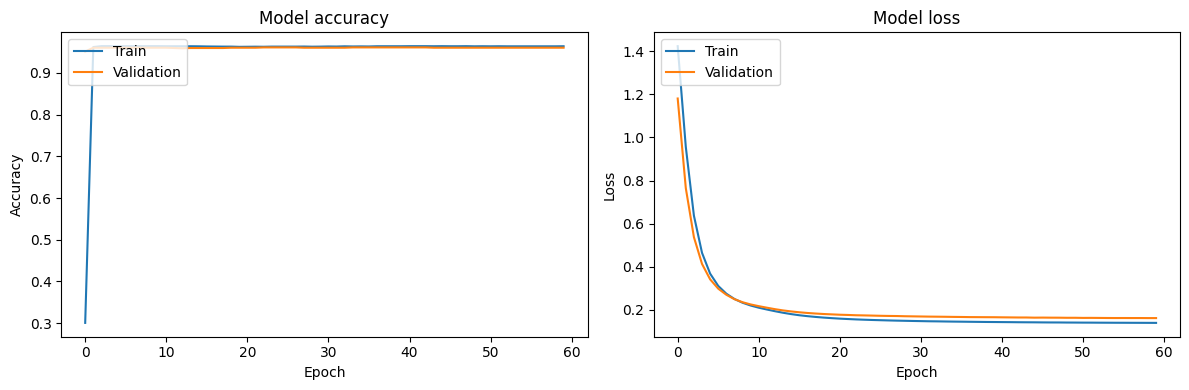

In [ ]:
history = model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test), callbacks=[early_stop])

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)
model.save(f"GRU_{MODEL_INPUT_DIMENSION}D_{MODEL_GRU_UNITS}L_{WINDOW_SIZE}W.keras")
tfjs.converters.save_keras_model(model, f"GRU_{MODEL_INPUT_DIMENSION}D_{MODEL_GRU_UNITS}L_{WINDOW_SIZE}W")

45/45 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9603


In [ ]:
zip_file_name = f"GRU_{MODEL_INPUT_DIMENSION}D_{MODEL_GRU_UNITS}L_{WINDOW_SIZE}W.zip"
directory_to_zip = f"GRU_{MODEL_INPUT_DIMENSION}D_{MODEL_GRU_UNITS}L_{WINDOW_SIZE}W"

import shutil
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', directory_to_zip)

'/content/GRU_5D_1L_20W.zip'